# Mean shift 附加异常用户特征点

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 设置中文显示
from pylab import mpl

mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 指定默认字体：解决plot不能显示中文问题
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

# 机器学习相关
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.preprocessing import MinMaxScaler

# 一、数据预处理
### 1 加载数据集

In [ ]:
df = pd.read_csv('./data/3-features.csv')
sus_user = pd.read_csv('../../data/各种来源的可疑ID（可作为标签）/使用可疑OPENID验证学员（去重）.csv')

df
sus_user

### 2 数据归一化

In [ ]:
scaler = MinMaxScaler()
train_x = scaler.fit_transform(df.drop("_id", axis=1))

### 3 过滤出异常用户
需要在缩放后再过滤异常用户.  
如果单独过滤出异常用户再缩放,不同的总体数据将导致不同的缩放比例

In [ ]:
df["_id"].info()    # Series
train_x             # ndarray

In [ ]:
# 1 为 train_x 添加回 id 列:使用 pd.concat(axis=1) 按列连接
train_x_with_id  = pd.concat([df["_id"],pd.DataFrame(train_x)],axis=1)

# 2 联表过滤
sus_user_df = pd.merge(sus_user, train_x_with_id, left_on="students",right_on="_id",how="inner")
sus_user_df.drop("students",axis=1,inplace=True)
sus_user_df.to_csv("./data/3-features-sus-scaled.csv",index=False)

In [15]:
# 3 异常用户数据转换为 ndarray，以便 scatter() 画图
train_sus = sus_user_df.drop("_id",axis=1).values

---
# 二、机器学习: MeanShift 聚类
※ 核心学习代码

In [ ]:
bandwidth = estimate_bandwidth(train_x, quantile=0.9, n_samples=1000)
classifier = MeanShift(bandwidth=bandwidth, n_jobs=-1)
classifier.fit(train_x)

labels = classifier.labels_
centers = classifier.cluster_centers_

In [ ]:
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

# 三、可视化

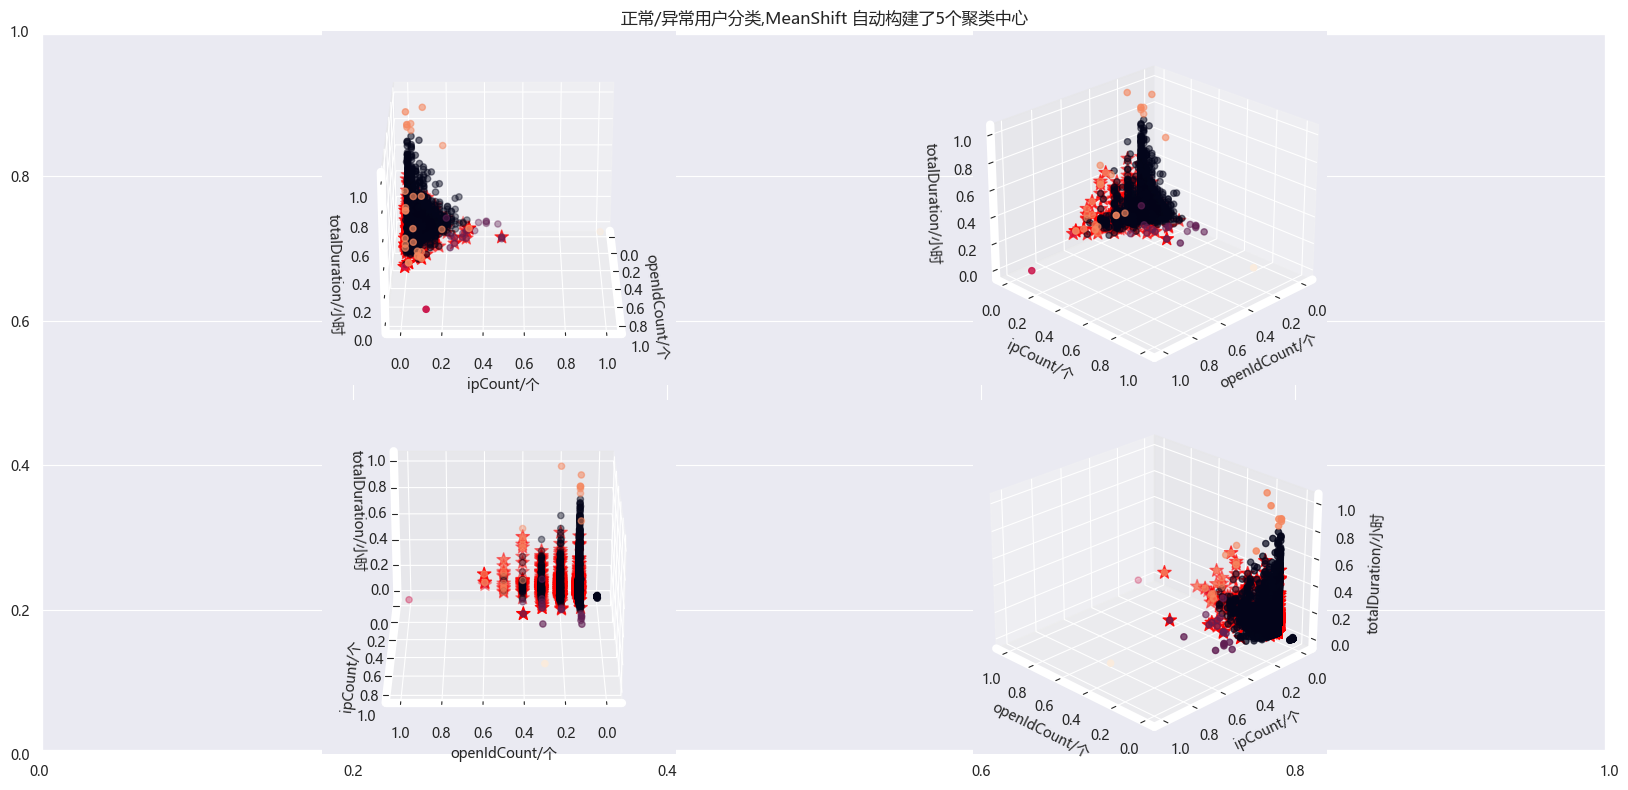

In [36]:
plt.rcParams['axes.linewidth'] = 6
fig = plt.figure(figsize=(16, 8))
plt.title(f"正常/异常用户分类,MeanShift 自动构建了{n_clusters_}个聚类中心")

# --子图1--
ax1 = fig.add_subplot(221, projection="3d", elev=25, azim=0)

ax1.set_xlabel("openIdCount/个")
ax1.set_ylabel("ipCount/个")
ax1.set_zlabel("totalDuration/小时")

ax1.scatter(train_x[:, 0], train_x[:, 1], train_x[:, 2], c=labels)
ax1.scatter(train_sus[:, 0], train_sus[:, 1], train_sus[:, 2], c="r", marker="*", s=100)

# --子图2--
ax2 = fig.add_subplot(222, projection="3d", elev=25, azim=45)

ax2.set_xlabel("openIdCount/个")
ax2.set_ylabel("ipCount/个")
ax2.set_zlabel("totalDuration/小时")

ax2.scatter(train_x[:, 0], train_x[:, 1], train_x[:, 2], c=labels)
ax2.scatter(train_sus[:, 0], train_sus[:, 1], train_sus[:, 2], c="r", marker="*", s=100)

# --子图3--
ax3 = fig.add_subplot(223, projection="3d", elev=25, azim=90)

ax3.set_xlabel("openIdCount/个")
ax3.set_ylabel("ipCount/个")
ax3.set_zlabel("totalDuration/小时")

ax3.scatter(train_x[:, 0], train_x[:, 1], train_x[:, 2], c=labels)
ax3.scatter(train_sus[:, 0], train_sus[:, 1], train_sus[:, 2], c="r", marker="*", s=100)

# --子图4--
ax4 = fig.add_subplot(224, projection="3d", elev=25, azim=135)

ax4.set_xlabel("openIdCount/个")
ax4.set_ylabel("ipCount/个")
ax4.set_zlabel("totalDuration/小时")

ax4.scatter(train_x[:, 0], train_x[:, 1], train_x[:, 2], c=labels)
ax4.scatter(train_sus[:, 0], train_sus[:, 1], train_sus[:, 2], c="r", marker="*", s=100)

# 使用 tight_layout 自动调整间距
fig.tight_layout()

plt.savefig("./imgs/MeanShift-3-features-with-SuspiciousUser(归一化).png")
plt.show()